Use simple neural network to recognize numbers from famous MNIST dataset

Trying out the impact of Dropout layer for accuracy

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),  # the spatial information of the images' features is lost when flattened
                                                                            # but no convolution is needed then 
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2940 - accuracy: 0.9140 - val_loss: 0.1332 - val_accuracy: 0.9593
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1403 - accuracy: 0.9586 - val_loss: 0.0980 - val_accuracy: 0.9705
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1069 - accuracy: 0.9675 - val_loss: 0.0827 - val_accuracy: 0.9741
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0870 - accuracy: 0.9729 - val_loss: 0.0828 - val_accuracy: 0.9749
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9764 - val_loss: 0.0696 - val_accuracy: 0.9782
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9791 - val_loss: 0.0666 - val_accuracy: 0.9784
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0661 - val_ac

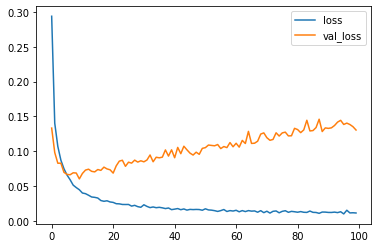

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

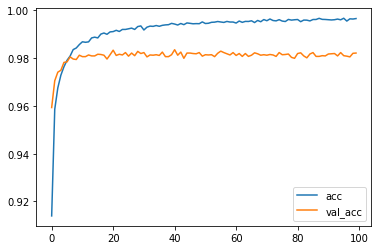

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1304 - accuracy: 0.9821


[0.13042904436588287, 0.9821000099182129]

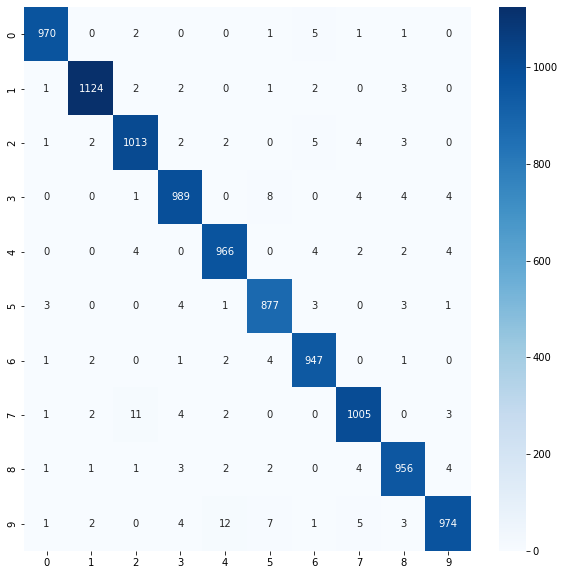

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

Text(0.5, 1.0, 'True label 2 Predicted: 7')

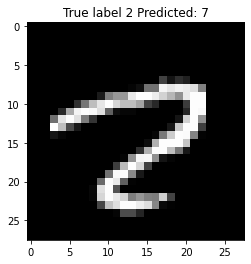

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label {y_test[i]} Predicted: {p_test[i]}")